we are testing 3 different algorithms 

In [1]:
pip install opencv-python numpy dlib face_recognition deepface facenet-pytorch scikit-learn mtcnn


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

In [3]:
pip install dlib

In [4]:
pip install cmake

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install dlib --no-cache-dir

In [6]:
pip install --upgrade pip setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install face_recognition

In [8]:
!pip install deepface

In [9]:
%pip install opencv-python scikit-learn matplotlib seaborn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [10]:
import cv2
print(cv2.__version__)

4.11.0


In [18]:
pip uninstall opencv-python --yes

Found existing installation: opencv-python 4.11.0.86Note: you may need to restart the kernel to use updated packages.

Uninstalling opencv-python-4.11.0.86:
  Successfully uninstalled opencv-python-4.11.0.86


You can safely remove it manually.


In [1]:
pip install opencv-contrib-python jupyter matplotlib scikit-learn numpy

  Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-win_amd64.whl (46.2 MB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.2 MB 4.2 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.2 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 4.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.3 MB 4.8 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/12.3 MB 5.9 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/12.3 MB 6.4 MB/s eta 0:00:02
   -------------- ------------------------- 4.5/12.3 MB 6.0 MB/s eta 0:00:02
   ----------------- ---------------------- 5.5/12.3 MB 5.5 MB/s eta 0:00:02
   -------------------- ------------------- 6.3/12.3 MB 5.2 MB/s eta 0:00:02
   -

In [8]:
import os
import cv2
import numpy as np
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
base_path = "comprehensive_db\\comprehensive_db"

# === 1. Load Data ===
def load_faces_from_folder(base_path, split='train', image_size=(100, 100)):
    faces = []
    labels = []
    person_names = []
    for person_name in os.listdir(base_path):
        person_folder = os.path.join(base_path, person_name, split)
        if not os.path.isdir(person_folder):
            continue

        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img_resized = cv2.resize(img, image_size)
            faces.append(img_resized)
            labels.append(person_name)  # use actual name for now
            person_names.append(person_name)

    return np.array(faces), np.array(labels)

# === 2. Encode Labels ===
def encode_labels(labels):
    le = LabelEncoder()
    numeric_labels = le.fit_transform(labels)
    return numeric_labels, le


In [14]:
X_train, y_train_names = load_faces_from_folder(base_path, 'train')
X_test, y_test_names= load_faces_from_folder(base_path, 'test')

In [15]:
def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test, label_encoder):
    model.train(X_train, y_train)
    predictions = []

    for face in X_test:
        label_pred, _ = model.predict(face)
        predictions.append(label_pred)

    # Decode numeric labels back to names
    y_test_names = label_encoder.inverse_transform(y_test)
    y_pred_names = label_encoder.inverse_transform(predictions)

    print(f"--- {model_name} ---")
    print(classification_report(y_test_names, y_pred_names))
    return classification_report(y_test_names, y_pred_names, output_dict=True)


In [16]:
y_train, label_encoder = encode_labels(y_train_names)
y_test = label_encoder.transform(y_test_names)

# Convert to correct format for OpenCV
X_train = [img for img in X_train]
X_test = [img for img in X_test]

# Create models
lbph_model = cv2.face.LBPHFaceRecognizer_create()
eigen_model = cv2.face.EigenFaceRecognizer_create()
fisher_model = cv2.face.FisherFaceRecognizer_create()

# Train and evaluate
lbph_results = train_and_evaluate_model(lbph_model, "LBPH Face Recognizer", X_train, y_train, X_test, y_test, label_encoder)
eigen_results = train_and_evaluate_model(eigen_model, "EigenFace Recognizer", X_train, y_train, X_test, y_test, label_encoder)
fisher_results = train_and_evaluate_model(fisher_model, "FisherFace Recognizer", X_train, y_train, X_test, y_test, label_encoder)

--- LBPH Face Recognizer ---
              precision    recall  f1-score   support

    abhijeet       1.00      1.00      1.00        52

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

--- EigenFace Recognizer ---
              precision    recall  f1-score   support

    abhijeet       1.00      1.00      1.00        52

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\lda.cpp:1087: error: (-5:Bad argument) At least two classes are needed to perform a LDA. Reason: Only one class was given! in function 'cv::LDA::lda'


In [17]:
print(f"Unique classes in y_train: {np.unique(y_train)}")
print(f"Number of classes: {len(np.unique(y_train))}")

Unique classes in y_train: [0]
Number of classes: 1


In [21]:
import os
import cv2
import numpy as np
from sklearn.metrics import classification_report

base_path = "comprehensive_db\\comprehensive_db"
image_size = (100, 100)

def load_images(folder, label, max_images=None):
    images = []
    labels = []
    for i, filename in enumerate(os.listdir(folder)):
        if max_images and i >= max_images:
            break
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(label)
    return images, labels

def train_individual_models(base_path):
    person_dirs = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
    for person in person_dirs:
        print(f"\nTraining model for: {person}")
        
        # Positive samples (label = 1)
        pos_train_dir = os.path.join(base_path, person, 'train')
        pos_test_dir = os.path.join(base_path, person, 'test')
        pos_train_imgs, pos_train_labels = load_images(pos_train_dir, label=1)
        pos_test_imgs, pos_test_labels = load_images(pos_test_dir, label=1)

        # Negative samples (label = 0) from other people's train dirs
        neg_train_imgs = []
        neg_train_labels = []
        neg_test_imgs = []
        neg_test_labels = []
        for other_person in person_dirs:
            if other_person == person:
                continue
            other_train_dir = os.path.join(base_path, other_person, 'train')
            other_test_dir = os.path.join(base_path, other_person, 'test')
            imgs, labels = load_images(other_train_dir, label=0, max_images=len(pos_train_imgs)//(len(person_dirs)-1))
            neg_train_imgs += imgs
            neg_train_labels += labels
            imgs, labels = load_images(other_test_dir, label=0, max_images=len(pos_test_imgs)//(len(person_dirs)-1))
            neg_test_imgs += imgs
            neg_test_labels += labels

        # Combine positives and negatives
        X_train = pos_train_imgs + neg_train_imgs
        y_train = pos_train_labels + neg_train_labels
        X_test = pos_test_imgs + neg_test_imgs
        y_test = pos_test_labels + neg_test_labels

        # Train LBPH model
        model = cv2.face.LBPHFaceRecognizer_create()
        model.train(X_train, np.array(y_train))

        # Evaluate
        predictions = []
        for face in X_test:
            label_pred, _ = model.predict(face)
            predictions.append(label_pred)

        print(classification_report(y_test, predictions, target_names=["Other", person]))

train_individual_models(base_path)



Training model for: abhijeet
              precision    recall  f1-score   support

       Other       1.00      0.88      0.94        42
    abhijeet       0.91      1.00      0.95        52

    accuracy                           0.95        94
   macro avg       0.96      0.94      0.95        94
weighted avg       0.95      0.95      0.95        94


Training model for: ashmi
              precision    recall  f1-score   support

       Other       1.00      0.93      0.96        14
       ashmi       0.96      1.00      0.98        25

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39


Training model for: avishkar
              precision    recall  f1-score   support

       Other       1.00      0.46      0.63       581
    avishkar       0.03      1.00      0.06        10

    accuracy                           0.47       591
   macro avg       0.52      0.73      0.

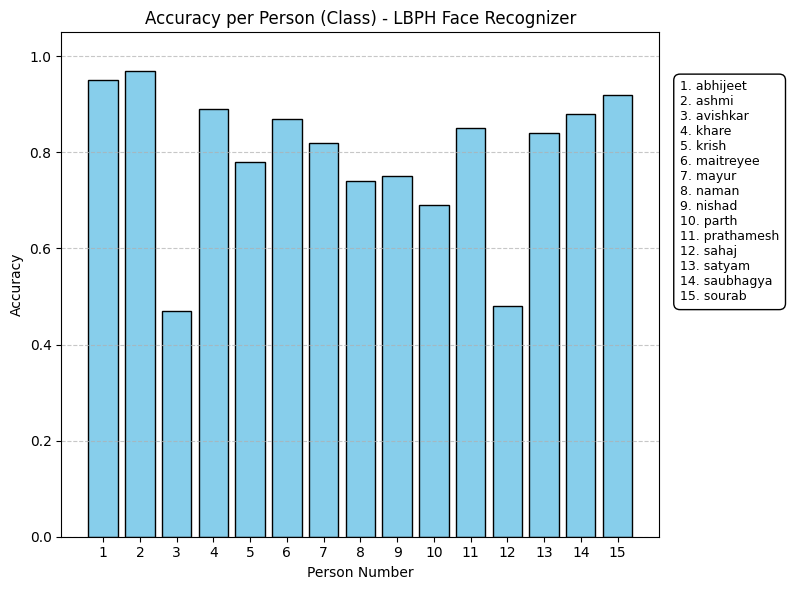

In [32]:
import matplotlib.pyplot as plt

# Accuracy data
accuracy_per_person = {
    'abhijeet': 0.95,
    'ashmi': 0.97,
    'avishkar': 0.47,
    'khare': 0.89,
    'krish': 0.78,
    'maitreyee': 0.87,
    'mayur': 0.82,
    'naman': 0.74,
    'nishad': 0.75,
    'parth': 0.69,
    'prathamesh': 0.85,
    'sahaj': 0.48,
    'satyam': 0.84,
    'saubhagya': 0.88,
    'sourab': 0.92
}

# Prepare data
names = list(accuracy_per_person.keys())
accuracies = list(accuracy_per_person.values())
indices = list(range(1, len(names)+1))  # [1, 2, ..., N]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(indices, accuracies, color='skyblue', edgecolor='black')
plt.ylim(0, 1.05)
plt.xlabel("Person Number")
plt.ylabel("Accuracy")
plt.title("Accuracy per Person (Class) - LBPH Face Recognizer")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(indices)

# Build numbered name list for legend
legend_text = "\n".join([f"{i}. {name}" for i, name in enumerate(names, start=1)])

# Add text box to the plot
plt.text(len(indices)+1.7, 0.95, legend_text, fontsize=9, va='top', ha='left',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()
